<a name="top" id="top"></a>

<div align="center">
    <h1>CHE597 - Decision Trees and Forests </h1>
    <a href="https://github.com/bernalde">David E. Bernal Neira</a>
    <br>
    <i>Davidson School of Chemical Engineering, Purdue University</i>
    <br>
    <a href="https://colab.research.google.com/github/SECQUOIA/PU_CHE597_S2025/blob/main/12-Decision_Trees_and_Forests/Decision_Trees_and_Forests.ipynb" target="_parent">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
    <a href="https://secquoia.github.io/">
        <img src="https://img.shields.io/badge/🌲⚛️🌐-SECQUOIA-blue" alt="SECQUOIA"/>
    </a>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Decision-Trees-and-Random-Forests" data-toc-modified-id="Decision-Trees-and-Random-Forests-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Decision Trees and Random Forests</a></span><ul class="toc-item"><li><span><a href="#Decision-Trees---Classification-Example" data-toc-modified-id="Decision-Trees---Classification-Example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Decision Trees - Classification Example</a></span></li><li><span><a href="#Decision-Trees---Limitations-of-Validation-Data" data-toc-modified-id="Decision-Trees---Limitations-of-Validation-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Decision Trees - Limitations of Validation Data</a></span></li><li><span><a href="#Decision-Trees---Adding-Noise" data-toc-modified-id="Decision-Trees---Adding-Noise-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Decision Trees - Adding Noise</a></span></li><li><span><a href="#Validation-with-a-Noisy-Example" data-toc-modified-id="Validation-with-a-Noisy-Example-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Validation with a Noisy Example</a></span></li><li><span><a href="#Decision-Tree---Regression-Example" data-toc-modified-id="Decision-Tree---Regression-Example-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Decision Tree - Regression Example</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Instability" data-toc-modified-id="Decision-Tree-Instability-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Decision Tree Instability</a></span></li></ul></li><li><span><a href="#Ensemble-Methods" data-toc-modified-id="Ensemble-Methods-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Ensemble Methods</a></span><ul class="toc-item"><li><span><a href="#Bagging" data-toc-modified-id="Bagging-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Bagging</a></span></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Random Forests</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Boosting</a></span><ul class="toc-item"><li><span><a href="#High-dimensional-example" data-toc-modified-id="High-dimensional-example-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>High-dimensional example</a></span></li><li><span><a href="#Gini-Importance" data-toc-modified-id="Gini-Importance-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Gini Importance</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# If using this on Google colab, we need to install the packages
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


<b>If you are using google colab you should save this notebook and any associated textfiles to their own folder on your google drive. Then you will need to adapt the following commands so that the notebook runs from the location of that folder.</b>

In [ ]:
# If you want to use Google Drive to save/load files, set this to True
USE_GOOGLE_DRIVE = False
if IN_COLAB and USE_GOOGLE_DRIVE:
    from google.colab import drive
    drive.mount('/content/drive')

    # Colab command to navigate to the folder holding the homework,
    # CHANGE FOR YOUR SPECIFIC FOLDER LOCATION IN GOOGLE DRIVE
    # Note: if there are spaces in the path, you need to precede them with a backslash '\'
    %cd /content/drive/My\ Drive/CHE597/Lectures/Trees_and_Forests

In [2]:
# Preliminary imports. random module will be used for shuffling lists
import matplotlib.pyplot as plt
import numpy as np

## Decision Trees and Random Forests
Up to this point we have focused on linear and non-linear regression models. We have used these models to illustrate aspects of model training that are general to all models, like splitting data into training, validation, and testing sets, estimating errors, and where necessary choosing an optimizer for finding parameters. 

When we use linear and non-linear regression we typically have physical basis for our chosen model. However, in many problems the relationships between features and predictions is too complex for us to know a potential analytical form beforehand. For problems where we don't know the form beforehand, we require very flexible and/or complex models that are capable of modeling generic phenomena. In this notebook we'll cover two such models, <b>decision trees</b> and an extension of decision trees called <b>random forests.</b> The latter is one of the best performing general models and is often the first thing people will attempt after simple linear regression fails. 

Decision trees are essentially flow charts that split up data based on features. Let's say that we have a dataset with $x_1$ and $x_2$ as features and $y$ as the variable we want to predict (let's say a classification like pass/fail). In the most typical implementation of decision trees, data is split based on either $x_1$ or $x_2$ (e.g., if $x_1 > 0.5$ data is assigned to one split and if not it is assigned to the other split) such that the resulting splits maximize "pass" classification in one of the splits and maximize "fail" classifications in the other split. These splits are then further split based on either $x_1$ or $x_2$ to further maximize "pass" and "fail" occurence in the subsequent splits. In general, finding the globally optimal set of splits is an np-hard problem, but if we split only based on one feature at a time in order to maximize our objective function (i.e., the "greedy" algorithm with binary splitting) the optimization problem of determining which feature and value to split on is tractable.

The collection of splitting rules can be pictorially presented as a "tree" or graph showing the splitting criteria. Since the resulting model is essentially just a flow chart, it is also highly interpretable (e.g., $x_1$ occurs in a lot of splits and is probably important, or $x_2$ only occures in two splits and doesn't significantly contribute to explaining the pass/fail relationship). Once we have the decision tree, we can also make predictions on new data points by passing them through the tree and observing which bin they end up getting placed in. 

Pictures help to explain this, so please consult the lecture notes for a more complete picture of how decision trees operate. 

### Decision Trees - Classification Example
Here we will demonstrate how decision trees work with a simple two feature classification task, along the lines of that described above. Because the problem only has two features it is easy to visualize, but note that decision trees generalize to large numbers of features and problems where $y$ is multi-dimensional. 


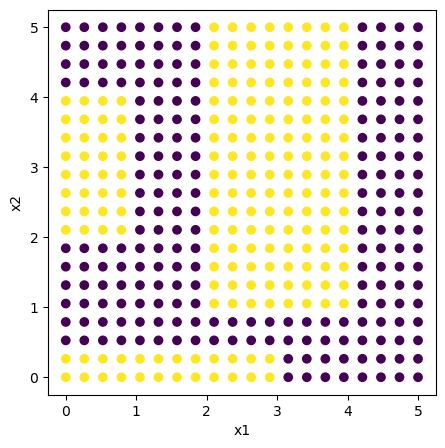

In [3]:
np.random.seed(352809821) # for reproducibility
x1 = np.linspace(0,5,20)
x2 = np.linspace(0,5,20)
x1,x2 = np.meshgrid(x1,x2)
x1 = x1.flatten()
x2 = x2.flatten()
X = np.vstack([x1,x2]).T

# Assign regions to pass/fail
Y = np.zeros(len(X))
Y[np.where((X[:,0]>2) & (X[:,0] < 4) & (X[:,1] > 1))] = 1
Y[np.where((X[:,1]>2) & (X[:,1] < 4) & (X[:,0] < 1))] = 1
Y[np.where((X[:,1]<0.5) & (X[:,0] < 3))] = 1

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

We will utilize scikit learn's decision tree implementation. As covered in previous notebooks, training an sklearn model consists of initializing an instance of the model then running the `.fit` method. For a classification decision tree (as in this case) the relevant model is `tree.DecisionTreeClassifier()` 

In [4]:
from sklearn import tree
model = tree.DecisionTreeClassifier() # default depth and purity criteria (will basically run until only pure leaves are obtained)
model.fit(X,Y)

DecisionTreeClassifier()

The model is now trained. Decision trees are what are known as "white-box" models, meaning that you can see everything about them, in contrast to a neural-network which is difficult to interpret. For example, we can even visualize the final decision tree using the sklearn function `tree.plot_tree()` and ascertain a lot about how the model is working. 

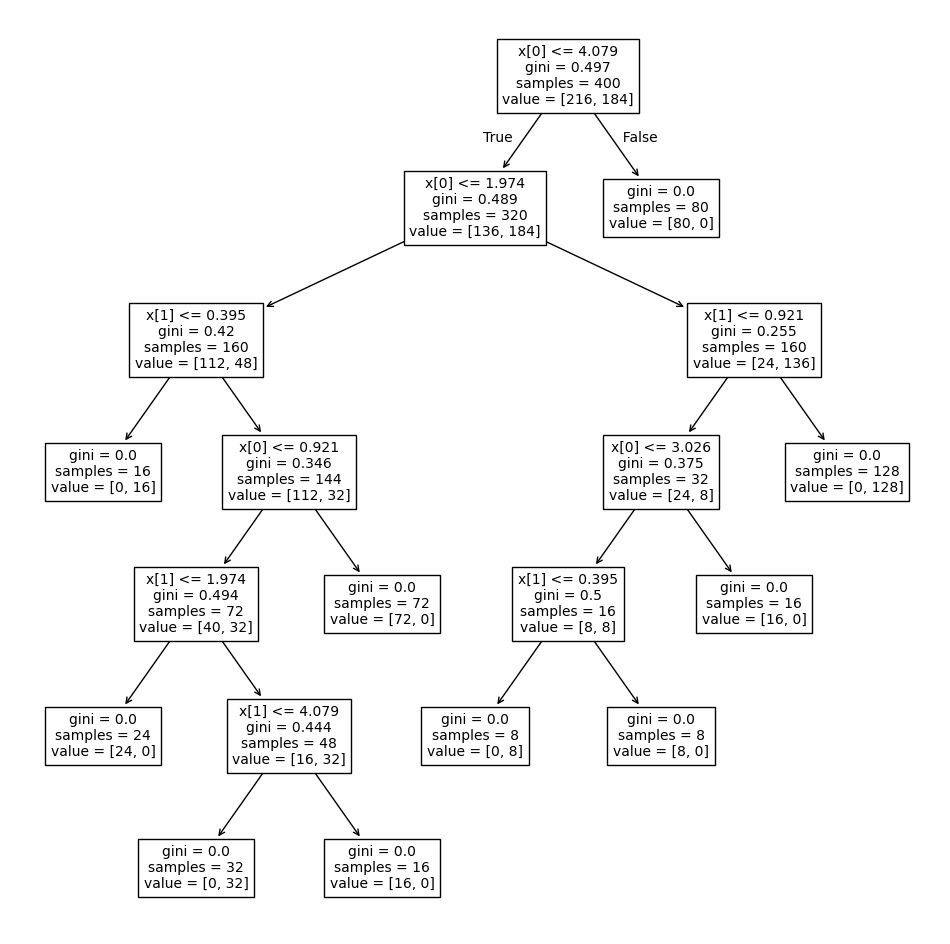

In [5]:
# Showing the resulting decision tree
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=10)
plt.show()

In these plots the splitting criteria is shown in each node (e.g., `X[0]<=4.079` in the first node) and the right arrow corresponds to `False`, and the left arrow to `True`. `gini` is the objective function used by the training algorithm to determine an optimal split (See notes for other options and further discussion). After the first split we are left with 80 datapoints with `X[0] > 4.079` and these are all classified as `0`. If you look at the plot of our training data, you can see that this is the split that results in the maximum number of datapoints with a constant composition (i.e., the rectangle of purple points on the right of the plot); any split along X[1] would have yielded a mixture at this stage. We will refer to the intermediate splits as <b>nodes</b> and the terminal positions in the tree as <b>leaves</b>. When using a decision tree to predict, you will follow the branches until landing on a leaf, at which point you can make a prediction based on the majority class (for classification problems), or the mean value (for regression problems) in that leaf. 

We can also visualize the model's performance by plotting its prediction on the training data, and the decision boundaries of the model. The former only shows the classification of individual points, whereas the latter shows the regions where classifications are applied. 

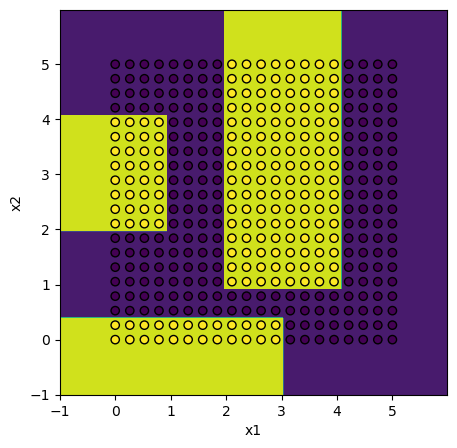

In [6]:
# Plot decision boundaries
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
plt.figure(figsize=(5,5))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z)

# Plot predictions
plt.scatter(X[:,0],X[:,1],edgecolors="k",c=model.predict(X))
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

It is obvious that if we let our tree grow indefinitely, eventually every sample will occupy a pure leaf and the training data will be perfectly memorized. To make our tree generalize better, we will typically utilize one or more stopping criteria:

- Is the node already pure enough? (`min_impurity_split` option)
- Has the tree reached a maximum depth? (`max_depth` option)
- Is the number of the samples in the split too small? (`min_samples_split` option)

Another common strategy is to intentionally overgrow the tree and then prune it, using validation data or information criteria for determining if a split is justified by the information available. This is generally referred to as "cost-complexity pruning". We won't cover it here, but you should be aware of it if you end up using decision trees in your own work.

Let's compare the model performance while varying the `max_depth` parameter in the model:


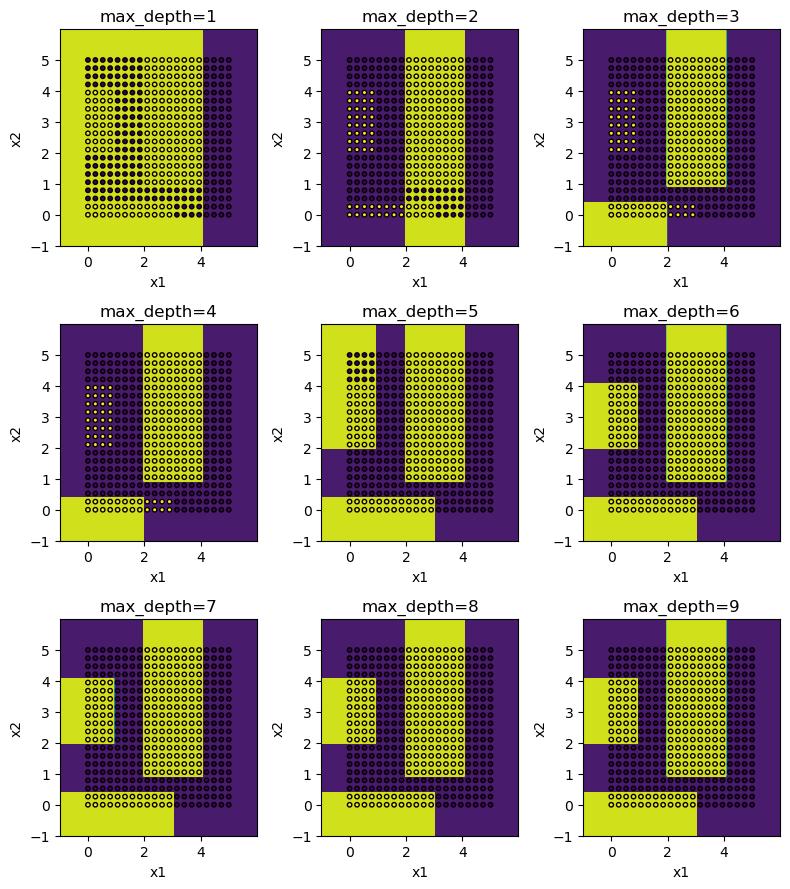

In [7]:
# Preinitialize arrays for decision boundary evaluation
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Loop over max_depth and evaluate the results
plt.figure(figsize=(8,9))
for i in range(1,10):
  model = tree.DecisionTreeClassifier(max_depth=i) # default depth and purity criteria (will basically run until only pure leaves are obtained)
  model.fit(X,Y)
  ax = plt.subplot(3,3,i)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # Note: np.c_ and np.r_ are useful slicing functions. Experiment to better understand.
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z)

  # Plot original data
  #ax.scatter(X[:,0],X[:,1],s=10,edgecolors="k",c=model.predict(X)) # uncomment to plot predictions
  ax.scatter(X[:,0],X[:,1],s=10,edgecolors="k",c=Y)
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  ax.set_title("max_depth={}".format(i))
plt.tight_layout()
plt.show() 

We've trained 9 different models with `max_depth` ranging from 1 to 9, and we've plotted the decision boundaries and known labels for each class (not the predictions). The results illustrate two important aspects of training decision trees. First, the depth of the tree controls the complexity of the relationships that the decision tree can predict. Until `max_depth=6` there are still incorrectly predicted samples, even for this highly idealized problem. Allowing the `max_depth` to be greater than 6 doesn't add anything for this problem, but when the dataset has noise, increasing the model complexity will lead to overfitting and poor generalization. Second, we can see that some splits don't appear to immediately be important. If you look at the `max_depth=3` and `max_depth=4` plots, you will see identical decision boundaries, even though the `max_depth=4` model has an additional set of splits (you can plot the decision trees using the `tree.plot_tree()` function to see for yourself). This doesn't mean that the additional split in `max_depth=4` is unimportant! In fact, it is critical for setting up the subsequent splits at depth 5 and 6 that resolves the yellow rectangle in the top left.    

One final point: when the leaves of a tree are impure (meaning there are misidentified samples in the training data), we base our classification on the most abundant class (i.e., the majority in binary classification). For example, in the `max_depth=1` case, the yellow region has a lot of purple points, but the whole region is predicted as being yellow. You can also calculate the probability of a classification based on the proportion of labels in the leaf using the `model.predict_proba(X)` method. 

### Decision Trees - Limitations of Validation Data
As we've discussed before, including a validation procedure for selecting hyperparameters it typically default behavior when training models. Let's see if we can use validation data to automatically identify an optimal tree depth for this case. We'll make an 80:20 split of our original training data, using 20% as a validation set for selecting `max_depth`.

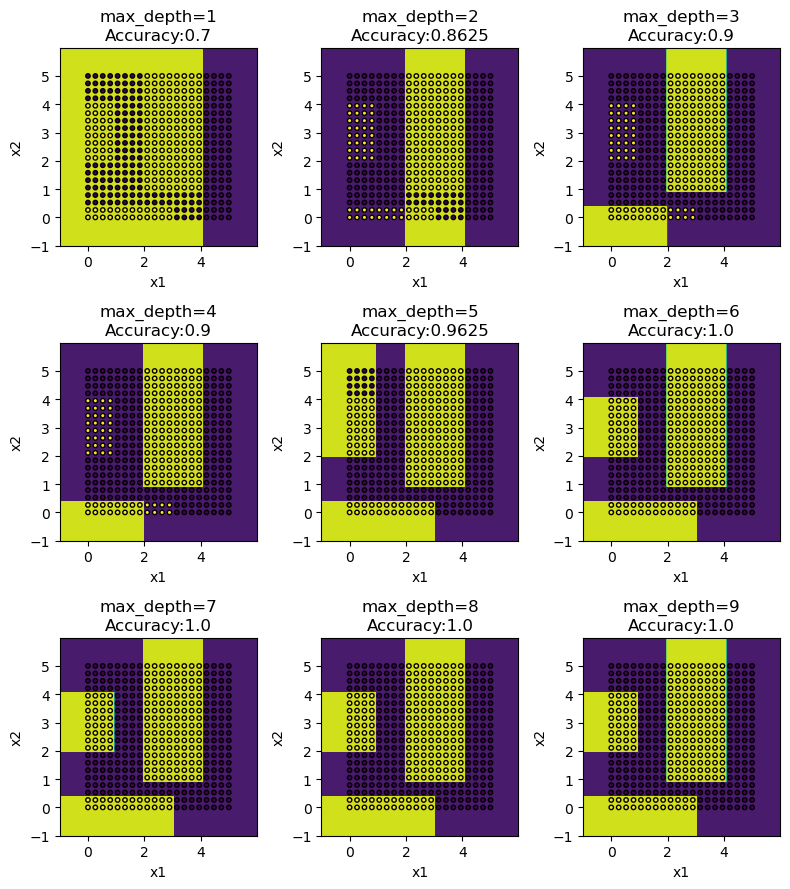

In [8]:
import random
from sklearn.metrics import accuracy_score

# Using validation data to determine an optimal tree depth
inds = list(range(len(X)))
random.shuffle(inds)
train_inds = inds[:int(len(X)*0.8)]
val_inds = inds[int(len(X)*0.8):]
X_train = X[train_inds]
Y_train = Y[train_inds]
X_val = X[val_inds]
Y_val = Y[val_inds]

# Loop over max_depth and evaluate the results
plt.figure(figsize=(8,9))
for i in range(1,10):
  model = tree.DecisionTreeClassifier(max_depth=i) # default depth and purity criteria (will basically run until only pure leaves are obtained)
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_val)
  acc = accuracy_score(Y_val,Y_pred)
  ax = plt.subplot(3,3,i)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z)

  # Plot original data
  #ax.scatter(X[:,0],X[:,1],s=10,edgecolors="k",c=model.predict(X)) # uncomment to plot predictions
  ax.scatter(X[:,0],X[:,1],s=10,edgecolors="k",c=Y)
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  ax.set_title("max_depth={}\nAccuracy:{}".format(i,acc))
plt.tight_layout()
plt.show() 

Why doesn't the validation set help us discriminate overfitting? Think about this for a little while, based on what you know about how decision trees are fit. 

The general answer is that using validation data is not a general remedy for overfitting. In the current case, the only way to move a split boundary is to lose the majority of one of the edges of one of the domains when splitting the validation from the training data. The situtation changes somewhat when we actually have noise in our data, but it is still a very important general lesson, and it motivates other strategies like cost-complexity pruning (covered later). 

<b>Note:</b> in the above example, you can see a small over fitting effect if you go to really large tree depths (~100). 

### Decision Trees - Adding Noise
Nothing fundamentally changes about training a decision tree when the data has noise, except that we will be cautious about overfitting. For completeness, let's see what happens when we add some noise to the data by swapping the labels of some of the training data, then training decision trees with varying `max_depth`:

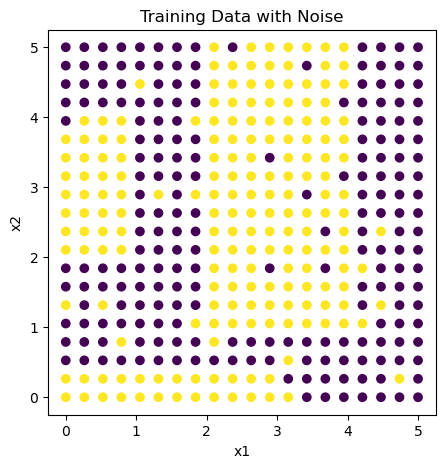

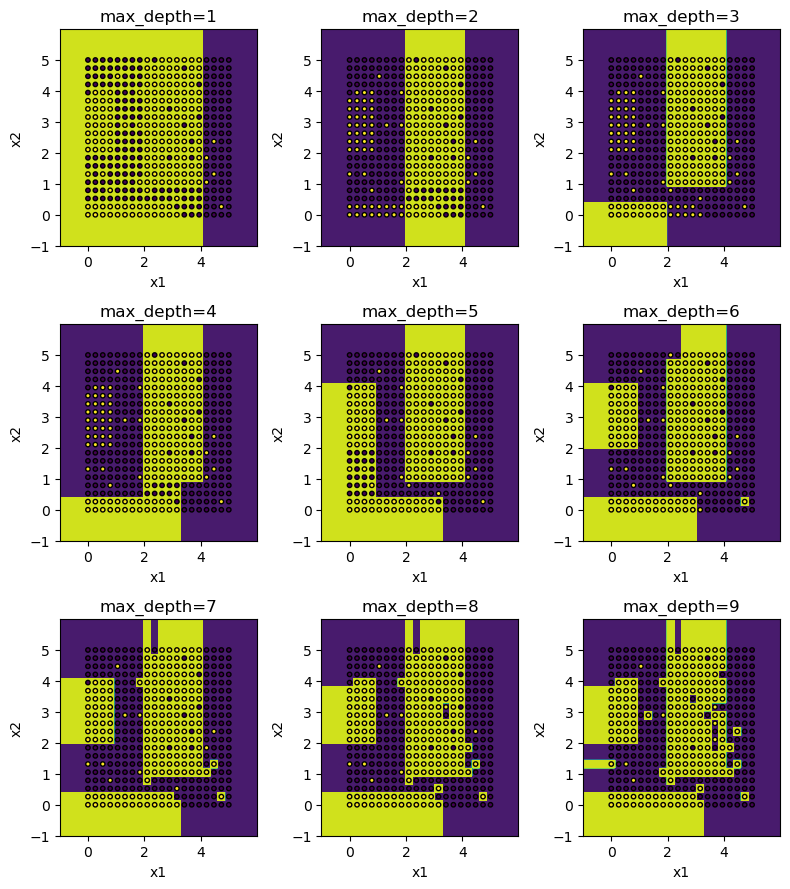

In [9]:
np.random.seed(352809821) # for reproducibility

# Assign regions to pass/fail
Y = np.zeros(len(X))
Y[np.where((X[:,0]>2) & (X[:,0] < 4) & (X[:,1] > 1))] = 1
Y[np.where((X[:,1]>2) & (X[:,1] < 4) & (X[:,0] < 1))] = 1
Y[np.where((X[:,1]<0.5) & (X[:,0] < 3))] = 1

# Randomly swap 30 labels
inds = np.random.randint(0,len(Y),size=30)
for i in inds:
  if Y[i] == 0:
    Y[i] = 1
  else:
    Y[i] = 0

# Plot new training data
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Training Data with Noise")

# Preinitialize arrays for decision boundary evaluation
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Loop over max_depth and evaluate the results
plt.figure(figsize=(8,9))
for i in range(1,10):
  model = tree.DecisionTreeClassifier(max_depth=i) # default depth and purity criteria (will basically run until only pure leaves are obtained)
  model.fit(X,Y)
  ax = plt.subplot(3,3,i)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z)

  # Plot original data
  #ax.scatter(X[:,0],X[:,1],edgecolors="k",c=model.predict(X)) # uncomment to plot predictions
  ax.scatter(X[:,0],X[:,1],edgecolors="k",s=10,c=Y)
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  ax.set_title("max_depth={}".format(i))
plt.tight_layout()
plt.show() 

The model performance is qualitatively the same until `max_depth=6`, but afterward we can witness the decision tree starting to modify boundaries in response to the noise. This results in several "regions" that are only the size of a single point. To avoid this behavior, the `min_samples_split` and `min_impurity_split` options could have also been used. We'll also discuss the idea of 'cost-complexity pruning' later. 

### Validation with a Noisy Example
Let's see how well using validation data works for selecting the `max_depth` parameter now that we actually have some noise in our data. We'll again use an 80:20 split, with 20 percent used as validation for estimating accuracy on non-training data. 

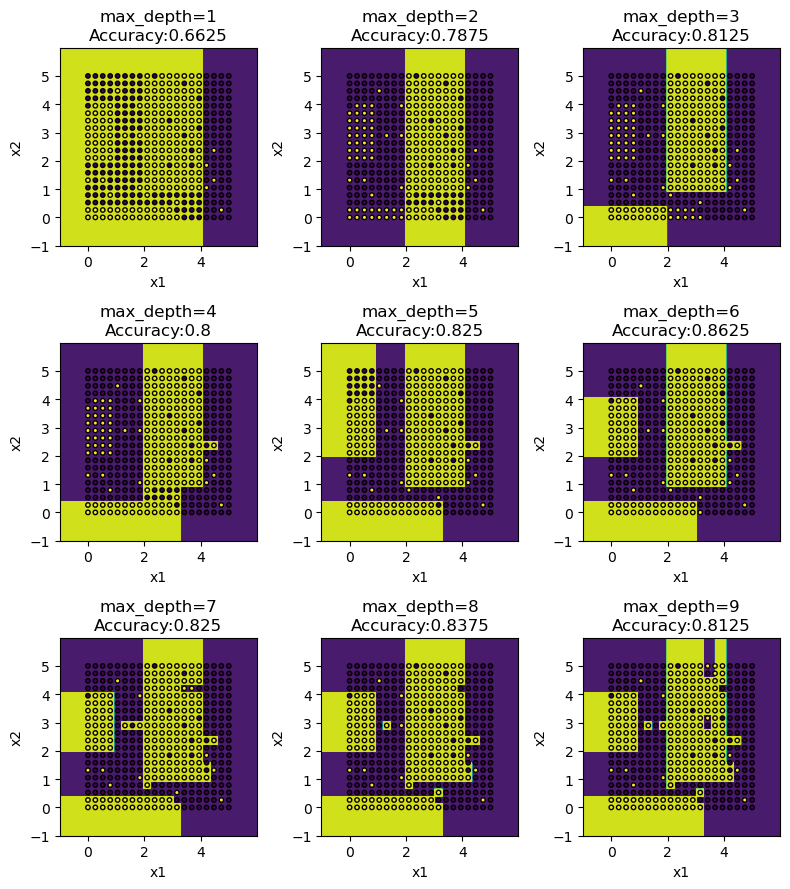

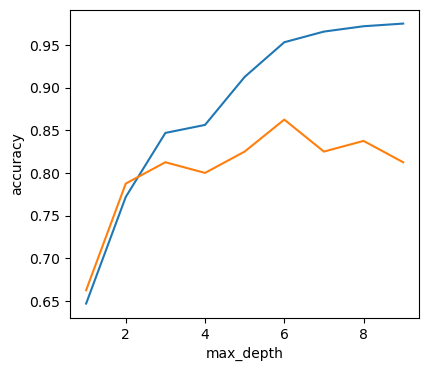

In [10]:
# Using validation data to determine an optimal tree depth
inds = list(range(len(X)))
random.shuffle(inds)
train_inds = inds[:int(len(X)*0.8)]
val_inds = inds[int(len(X)*0.8):]
X_train = X[train_inds]
Y_train = Y[train_inds]
X_val = X[val_inds]
Y_val = Y[val_inds]

# Loop over max_depth and evaluate the results
plt.figure(figsize=(8,9))
v_acc = []
t_acc = []
for i in range(1,10):
  model = tree.DecisionTreeClassifier(max_depth=i) # default depth and purity criteria (will basically run until only pure leaves are obtained)
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_val)
  v_acc += [accuracy_score(Y_val,Y_pred)]
  t_acc += [accuracy_score(Y_train,model.predict(X_train))]
  ax = plt.subplot(3,3,i)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z)

  # Plot original data
  #ax.scatter(X[:,0],X[:,1],s=10,edgecolors="k",c=model.predict(X)) # uncomment to plot predictions
  ax.scatter(X[:,0],X[:,1],s=10,edgecolors="k",c=Y)
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  ax.set_title("max_depth={}\nAccuracy:{}".format(i,v_acc[-1]))
plt.tight_layout()


# Make accuracy vs max_depth
plt.figure(figsize=(4.5,4))
plt.plot(range(1,10),t_acc,label="training")
plt.plot(range(1,10),v_acc,label="validation")
plt.xlabel("max_depth")
plt.ylabel("accuracy")

plt.show() 

### Decision Tree - Regression Example
Because decision trees only have a finite number of leaves, it might seem like they are only suited for classification problems, and not regression problems where $y$ can assume continuous values. However, there is nothing substantially different about applying decision trees to continuous data, besides the fact that the leaves will only make predictions based on the mean of the samples in the leaf and the objective function will be different (e.g., making splits based on minimizing the mean squared error). 

Let's take a look at the training data that we used in the `estimation.ipynb` notebook and see how the decision tree performs:

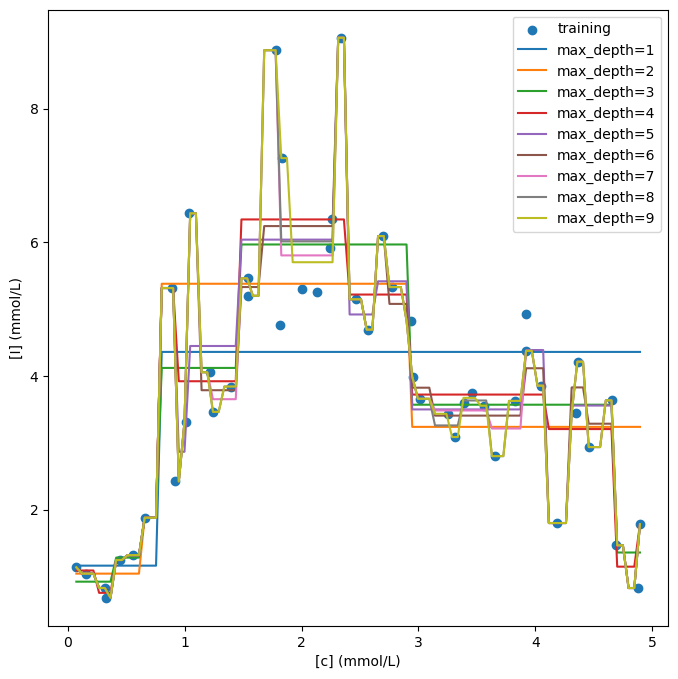

In [11]:

# Load data
data = np.loadtxt("data.txt",skiprows=1)
x = data[:,0]
y = data[:,1]

# Plot data
plt.figure(figsize=(8,8))
plt.scatter(x,y,label="training")
plt.xlabel("[c] (mmol/L)")
plt.ylabel("[I] (mmol/L)")

# Train decision tree regressors and fit
x_pred = np.linspace(min(x),max(x),100)
for i in range(1,10):
  model = tree.DecisionTreeRegressor(max_depth=i)
  model.fit(x.reshape(-1, 1),y)
  plt.plot(x_pred,model.predict(x_pred.reshape(-1,1)),label="max_depth={}".format(i))
plt.legend()
plt.show()

As expected, the model has a patchiness due to the topology of the decision tree. For `max_depth=1` the model can only predict two values (approximately 1 and 4), but for `max_depth=9` you can see that the model is actually capable of a lot of complexity because the number of leaves can grow exponentially with the depth of the tree. Clearly `max_depth=9` is learning a lot of noise, and `max_depth=1` is insufficiently expressive, but something like `max_depth=3` is actually a reasonable fit to the data, and avoids fitting the obvious outliers. Whether or not this patchiness is good or bad depends on the application.

#### Decision Tree Instability
Something that I haven't highlighted is that the specific configuration of a decision tree is highly sensitive to the noise in the data and features that you use in the model. For example, imagine that depending on how you randomly select your training data, the first split in your tree is based on x1 instead of x2. That decision will probagate down into all of the later nodes of the tree, such that the tree topology can be vastly different depending on which particular feature is selected to form a split. 

We can even illustrate this with the simple one-dimensional regression task of `[c]` vs `[I]` from above. For example, let's train two independent decision trees based on a randomly selected subset of 80% of the training data:


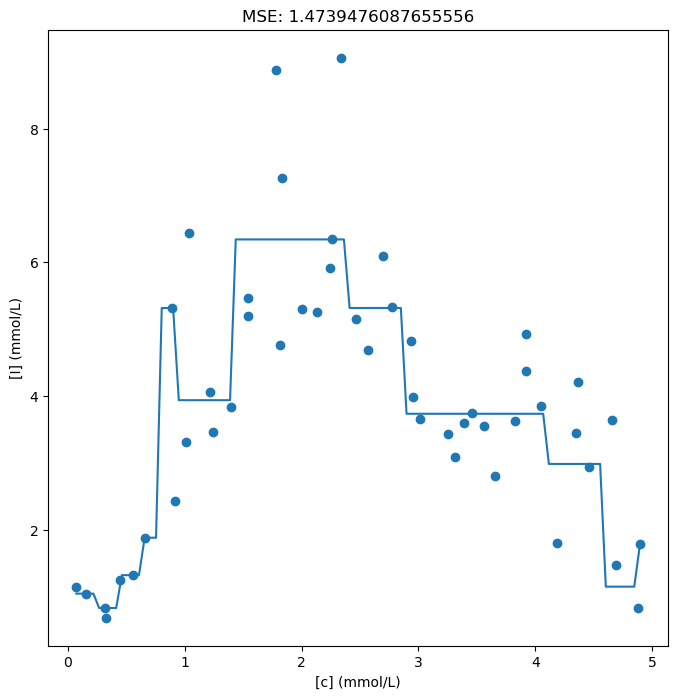

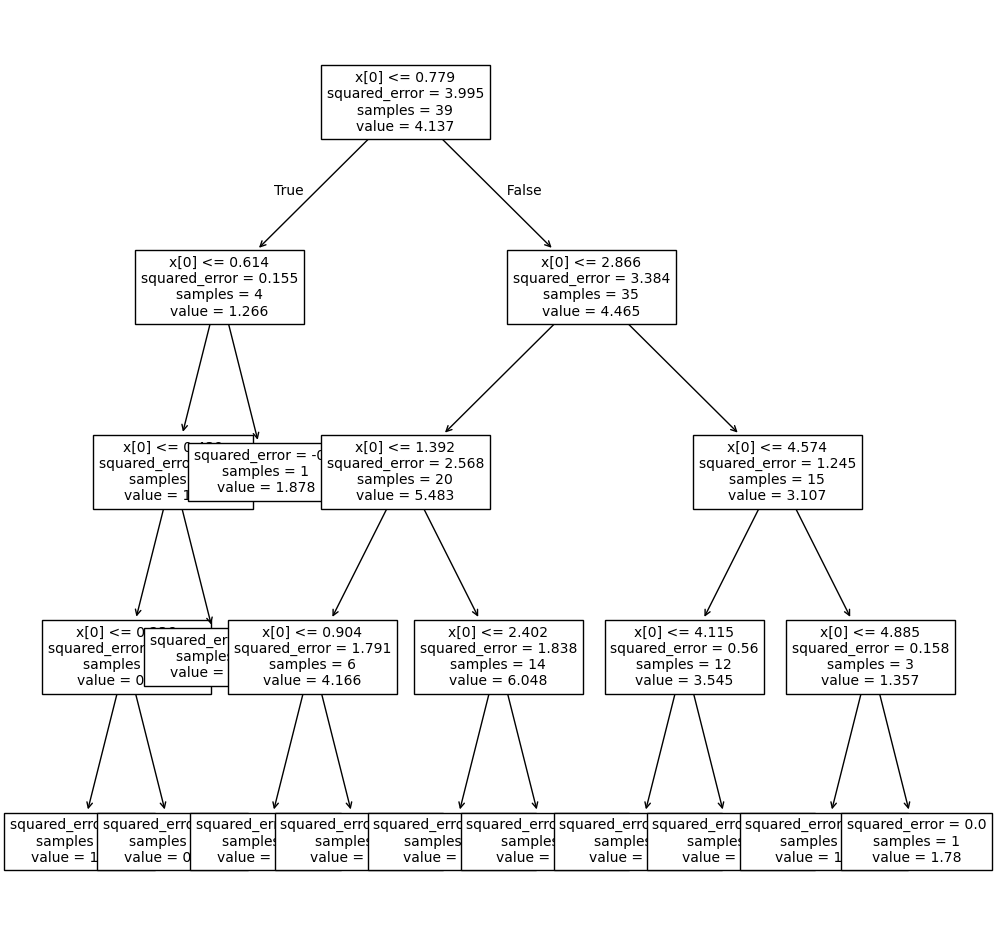

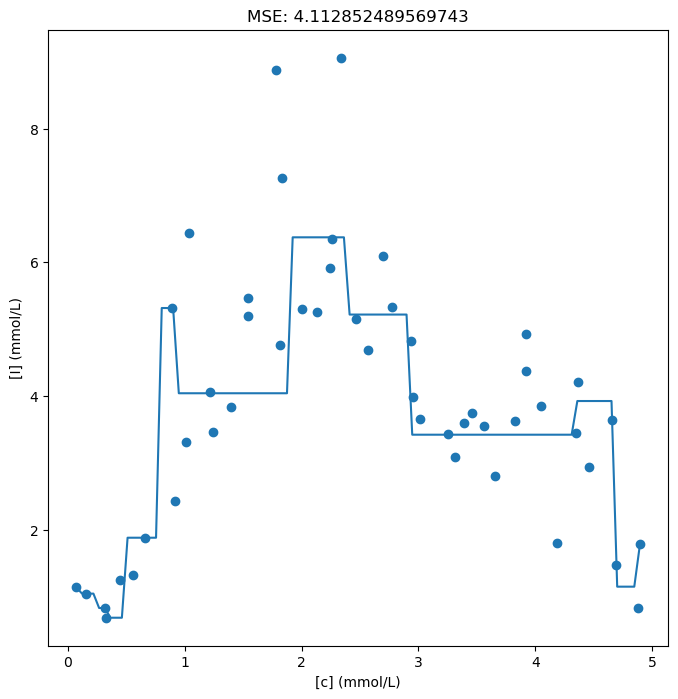

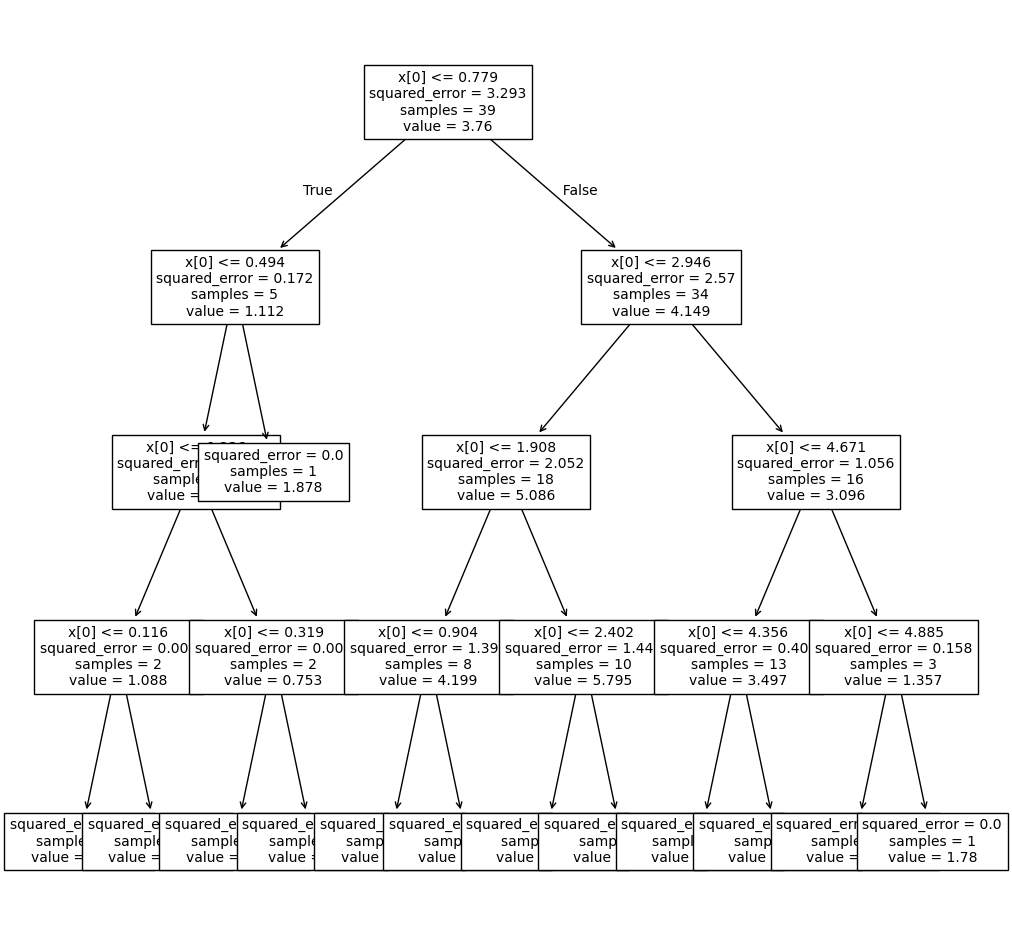

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# train_test_split is a helper function for generating random splits
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2,random_state=135323)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.2,random_state=235786)

# Train the first model
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(x1_train.reshape(-1, 1),y1_train)

# Plot the model predictions 
x_pred = np.linspace(min(x),max(x),100)
err = mean_squared_error(y1_test,model.predict(x1_test.reshape(-1, 1)))
plt.figure(figsize=(8,8))
plt.scatter(x,y,label="data")
plt.xlabel("[c] (mmol/L)")
plt.ylabel("[I] (mmol/L)")
plt.plot(x_pred,model.predict(x_pred.reshape(-1, 1)),label="DT-1")
plt.title("MSE: {}".format(err))

# Plot the first model's tree
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=10)
plt.show()


# Train the second model
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(x2_train.reshape(-1, 1),y2_train)

# Plot the model predictions
err = mean_squared_error(y2_test,model.predict(x2_test.reshape(-1, 1)))
plt.figure(figsize=(8,8))
plt.scatter(x,y,label="data")
plt.xlabel("[c] (mmol/L)")
plt.ylabel("[I] (mmol/L)")
plt.plot(x_pred,model.predict(x_pred.reshape(-1, 1)),label="DT-2")
plt.title("MSE: {}".format(err))

# Plot the second model's tree
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=10)
plt.show()


Given that the problem only has a single feature, the effect isn't dramatic, but we can still see the topology of the network changes and the values of the splits on x. The instability only grows as the dimensionality of the problem increases. This is a downside of decision trees. Although, as we'll see next, it can actually be creatively repackaged into being a positive in a slightly different context.

### Ensemble Methods
Ensemble models are models that combine a bunch of relatively inaccurate models ("weak learners" is also an equivalent term) in order to make predictions. The idea is that if the models are uncorrelated, then their errors will tend to cancel out, and the mean prediction over all models can be very accurate. This is referred to in the vernacular as "the wisdom of crowds", whereby individual members of a crowd can be very wrong, but the average over the crowd can be accurate. For this to work, however, the models need to have relatively uncorrelated errors. For instance, considering the example of taking a survey over a crowd of people, their estimates would only be relatively uncorrelated if they didn't share information beforehand (e.g., by reading the same news sources, etc). There is actually a lot of interesting work on how this can have real world consequences. For instance, one common meeting strategy is to get opinions on an action item from participants in advance, then discussing the results in the meeting, instead of going around the table. One tends to find that the round-table method yields much more monolithic opinions as later speakers are influenced by the first speakers and you lose the "wisdom" of the crowd. 

Further discussing the "wisdom of crowds" is beyond our current scope. The main thing is that we want to assemble weak learners that are relatively independent when we are considering ensemble methods. How can we do this in practice? 

#### Bagging 
Breiman realized that the instability of decision trees could actually be a positive aspect from the perspective of training an ensemble method. His original idea was to train multiple decision trees on bootstrap resampled training datasets. By aggregating the trees generated in this way, he hypothesized that the model would be more accurate and generalize better. This method of training weak learners on bootstrap resampled datasets then aggregating the resulting models has come to be known as "bagging" (i.e., bagging=Bootstrap-AGGregatING) and when applied to decision trees it is known as "bagged trees". A lot of work has been done trying to prove the convergence behavior with respect to the number of weak learners, etc., but the main thing is that in practice it is almost always superior to individual decision trees in terms of performance. The downside of bagging and other ensemble methods is that you lose some of the interpretability of the model.  

Note, as described bagging can be combined with any weak learner. However, decision trees are the most common weak learner to combine in the bagging procedure. The relevant model in scikit-learn is `sklearn.ensemble.BaggingRegressor` (for regression; a separate classification version exists). This model accepts a weak learner (`DecisionTreeRegressor` by default), and has relvant hyperparameters `n_estimators`, `n_samples`, `max_features`, corresponding to the number of weak learners to train, the number of samples to include in each bootstrap resampled training dataset, and the number of features from the original `X` to include in training each learner, respectively. By default, `max_features` uses all available `X` features, just like decision trees, but there are some advantages to randomly including a subset of features, which is the basis for random forests that is covered next. Let's illustrate bagged trees using our regression problem:

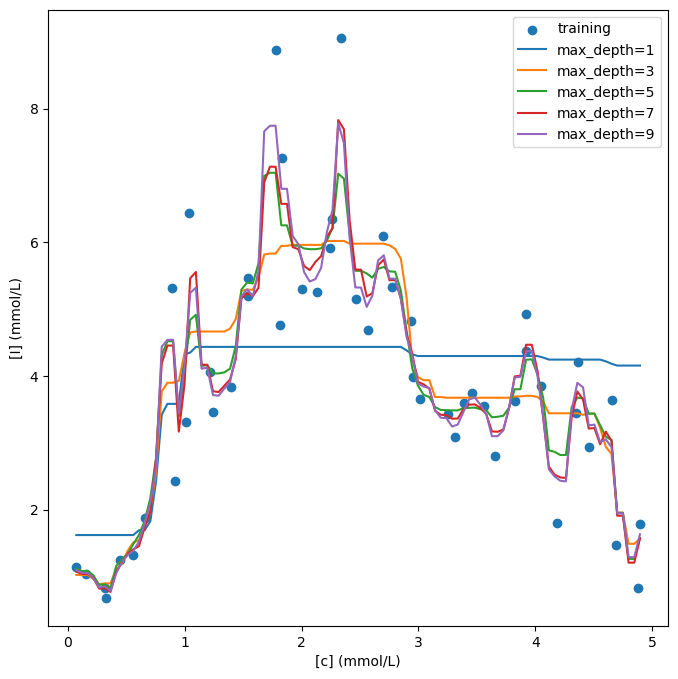

In [14]:
from sklearn.ensemble import BaggingRegressor

# Plot data
plt.figure(figsize=(8,8))
plt.scatter(x,y,label="training")
plt.xlabel("[c] (mmol/L)")
plt.ylabel("[I] (mmol/L)")

# Train decision tree regressors and fit
x_pred = np.linspace(min(x),max(x),100)
for i in range(1,10,2):
  model = BaggingRegressor(tree.DecisionTreeRegressor(max_depth=i),n_estimators=100)
  model.fit(x.reshape(-1, 1),y)
  plt.plot(x_pred,model.predict(x_pred.reshape(-1,1)),label="max_depth={}".format(i))
plt.legend()
plt.show()

#### Random Forests

Bagging uses bootstrap resampled training sets to generate relatively independent learners. Can you think of another basis for generating independent learners? That's right, by selecting a random subset of features for training each tree. Let's say that you have a 10 dimensional problem. When you ordinarily train a decision tree, the optimizer would usually consider all ten features when making each split in a greedy fashion. However, you can introduce independence by intentionally only training one tree on three of the features and a second on three more features, and so on. Typically the random selection of features is done at each split, rather than at the tree level. Breiman combined the concept of randomly selecting features in this way (i.e., "feature bagging") with bootstrap resampling to form the <b>random forest</b> algorithm. Typically, tens to thousands of decision trees trained in this way are combined to form a model. 

The relevant model in scikit-learn is `sklearn.ensemble.RandomForestRegressor` (for regression; a separate classification version exists). This model inherits most of the options from the `DecisionTreeRegressor` class, but also requires you to specify how many trees you want to utilize (`n_estimators` option) and supplies other options related to bootstrap resampling and feature selection. Let's illustrate using our regression problem (Note: since there is only a single feature in this case, the main effect of using random forests comes from the use of bootstrap resampling):

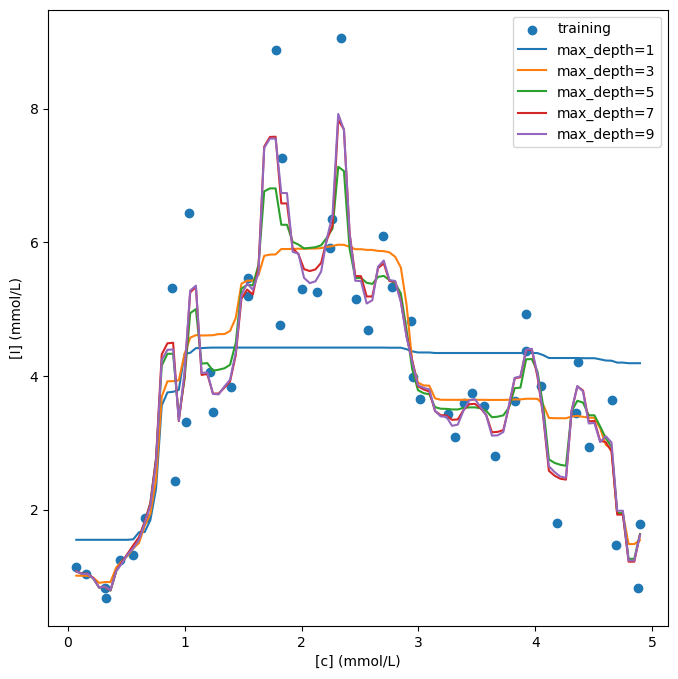

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Plot data
plt.figure(figsize=(8,8))
plt.scatter(x,y,label="training")
plt.xlabel("[c] (mmol/L)")
plt.ylabel("[I] (mmol/L)")

# Train decision tree regressors and fit
x_pred = np.linspace(min(x),max(x),100)
for i in range(1,10,2):
  model = RandomForestRegressor(max_depth=i,n_estimators=1000)
  model.fit(x.reshape(-1, 1),y)
  plt.plot(x_pred,model.predict(x_pred.reshape(-1,1)),label="max_depth={}".format(i))
plt.legend()
plt.show()

By averaging over many decision trees, the random forests models look a lot like continuous (if somewhat blocky) functions. 

<b>Note:</b> similar to bootstrapping you can also use the decision trees that comprise the random forest to get prediction bounds (currently this isn't automatically implemented in scikit learn but you can implement it on your own).

#### Summary
<b>Pros:</b> decision trees are highly interpretable, inexpensive to train, support numerical and categorical data, and are flexible enough to handle many different modeling scenarios

<b>Cons:</b> decision trees are prone to overfitting, can dramatically change depending on training data and featurization.

Random forests turn some of the cons of decision trees into pros, because it is easy to generate independent decision trees for the same problem using bootstrap resampling (bagging) and by changing the features that you use in the model. Random forests give up some of the interpretability of decision trees, but are one of the strongest generic models for complex problems. 

### Boosting
While we train our weak learners for a random forest, there is some information available to us that we haven't discussed yet. Let's think this through. Let's say we are going to train 100 decision trees. We train the first one, then the second one, then the third one, and so on. In random forests, each tree is trained independently, meaning each one doesn't know about any of the ones before it, but this neglects some potentially useful information. Can you guess what it is?

The information in question is how well the trees we have already train perform on the training data. What if when we train the second tree, we try to improve the accuracy on the training points that the first tree did poorly on? This is the fundamental idea of boosting. 

The first implementation of this idea is known as <b>Adaboost</b>. The algorithm is pretty simple. Each datapoint has a weight associated with it, that starts as $1/N$. Since each datapoint is weighted equally, the first tree is trained as normal. After the first tree is trained, the weights are updated according to error of the current model on each datapoint (e.g., squared error or absolute error). When training the second tree, these weights can be applied during bootstrap resampling the dataset or for influencing the splits (e.g., modifying the Gini loss to more strongly favor purifying high-error points). The new tree is then mixed in with the other trees by a fraction that minimizes the overall training error. In this way, as the training proceeds, the overall model tries to self-correct. 

Although originally Adaboost was implemented with decision "stumps" (i.e., decision trees with a single split), it is now routinely used with trees of varying depth. At a later stage, it was realized that Adaboost can be considered a specifc instance of what is known as <b>gradient boosting</b>. Specifically, you can imagine deciding each split when training new trees based on minimizing an arbitrary loss function, where Adaboost is just one example, but many loss functions are potentially useful in practice.  There are now many flavors of boosting (e.g., XGBoost, LightGBM, and many others) that are differentiated by how they use the high error datapoints in training subsequent weak learners.

The relevant models in scikit-learn are `sklearn.ensemble.AdaBoostRegressor` and `sklearn.ensemble.GradientBoostingRegressor` (for regression; separate classification versions exist). Among the important hyperparameters are `n_estimators` and `learning_rate` which control the number of trees and the contribution of each subsequent tree to the model, respectively. 

#### High-dimensional example
To illustrate the performance of the various ensemble models we've covered so far, let's look at a very high-dimensional problem. Specifically, we have a dataset of solvation free energies for a few hundred small molecules in water. As features, we have about a thousand descriptors supplied by the cheminformatics community. Essentially, these are simple quantities that can be calculated based solely on the molecular formula. Let's load the data:

In [16]:
import pandas as pd
# Load free energy of solvation data for small molecules in water

features = pd.read_csv("SAMPL_descriptors_df.csv") # Note will give a warning about some of the features being mixed type.
labels = pd.read_csv("SAMPL_df_revised.csv")

# Only keep the features that can be converted to floats
keeps = []
for i in features.columns:
    try: 
        features[i] = features[i].apply(float)
        keeps += [i]
    except:
        pass
features = features[keeps]

print("features:\n{}".format(features))
print("labels:\n{}".format(labels))


/tmp/ipykernel_19366/2869527302.py:4: DtypeWarning: Columns (15,53,54,55,56,57,58,59,60,61,137,146,152,153,154,155,164,173,182,191,200,209,218,227,260,261,262,263,264,265,266,267,268,344,353,362,368,369,370,371,380,389,398,407,416,425,434,443,451,457,458,459,473,474,475,483,491,499,507,515,523,531,539,547,553,554,555,569,570,571,579,587,595,603,611,619,627,635,647,648,678,691,704,717,730,743,756,769,832,858,866,867,874,882,883,918,931,1274,1275,1276,1277,1348,1764,1792,1793,1795,1823) have mixed types. Specify dtype option on import or set low_memory=False.
  features = pd.read_csv("SAMPL_descriptors_df.csv") # Note will give a warning about some of the features being mixed type.


features:
          ABC     ABCGG  nAcid  nBase    SpAbs_A   SpMax_A  SpDiam_A  \
0    9.439677  8.813176    0.0    0.0  16.051962  2.288246  4.576491   
1    3.464102  3.464102    0.0    0.0   4.000000  2.000000  4.000000   
2    3.047207  3.305183    0.0    0.0   5.226252  1.847759  3.695518   
3    5.656854  5.427660    0.0    0.0  10.424292  2.135779  4.271558   
4    4.949747  5.143137    0.0    0.0   9.517541  1.879385  3.758770   
..        ...       ...    ...    ...        ...       ...       ...   
637  7.180458  7.101974    0.0    0.0  13.045879  2.010756  4.021513   
638  3.535534  3.535534    0.0    1.0   6.472136  2.000000  3.618034   
639  6.473351  6.127583    0.0    0.0  11.189957  2.193993  4.387987   
640  4.949747  5.143137    0.0    0.0   9.517541  1.879385  3.758770   
641  4.242641  4.000000    0.0    0.0   8.000000  2.000000  4.000000   

        SpAD_A   SpMAD_A   LogEE_A  ...     SRW09     SRW10     TSRW10  \
0    16.051962  1.234766  3.451148  ...  0.000000  

This dataset consists of 642 molecules with reported experimental and simulated solvation free energies in water (i.e., more negative indicates more likely to be soluble). In addition, we have a lot of features (1825) consisting of various cheminformatics quantities that can be cheaply calculated from the molecular formula. We have cleaned this up a bit by keeping only the descriptors that can be converted to floats (1073). In the cell below, let's test decision trees against bagged trees, random forests, adaboost, and gradient boosting. You should experiment with hyperparameters in the cell below! 

DT training/testing errors: 0.0003/4.9484 kcal/mol
top 10 Gini important features: ['TopoPSA(NO)', 'nHBDon', 'TopoPSA', 'AATS1are', 'GATS1se', 'AATSC1are', 'fMF', 'ATSC5p', 'ATSC1i', 'ETA_eta_FL']


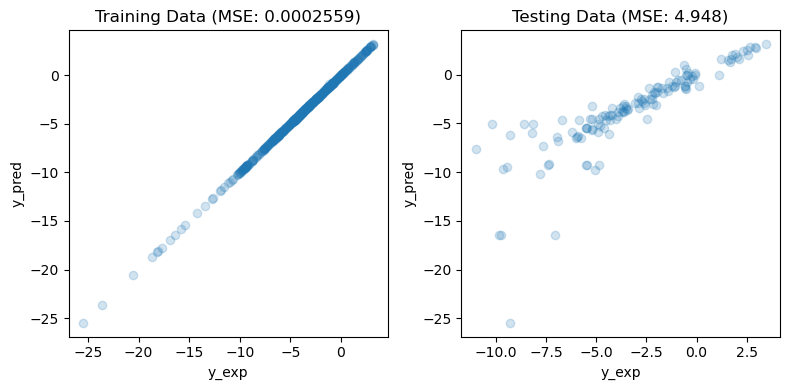

RF training/testing errors: 0.2216/0.7114 kcal/mol
top 10 Gini important features: ['TopoPSA(NO)', 'nHBDon', 'GATS1se', 'AATSC1pe', 'PEOE_VSA1', 'SLogP', 'TopoPSA', 'ATSC1are', 'MATS1pe', 'IC1']


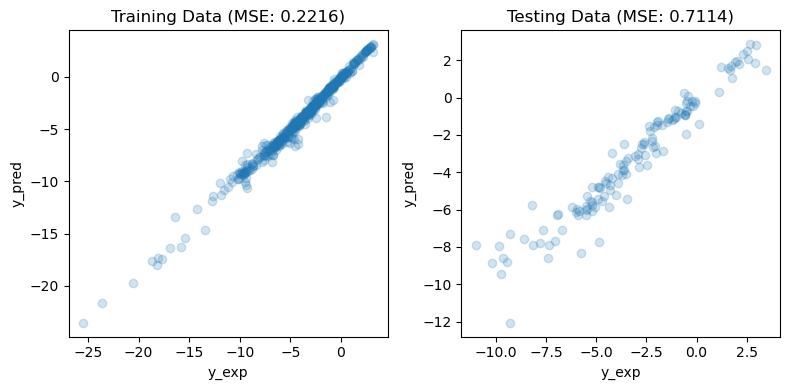

BR training/testing errors: 0.3298/0.8592 kcal/mol
bagging requires you to collate the importance of all of the sub-trees to get this list.


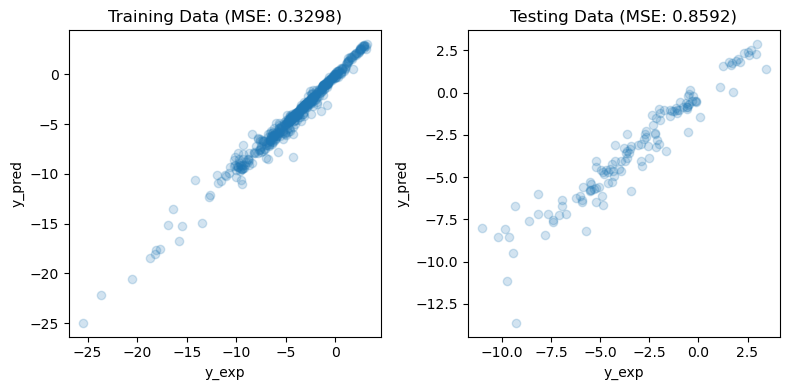

ADA training/testing errors: 0.0018/0.5940 kcal/mol
top 10 Gini important features: ['TopoPSA(NO)', 'nHBDon', 'TopoPSA', 'AATSC1pe', 'ETA_dEpsilon_D', 'AATSC1are', 'SLogP', 'SlogP_VSA1', 'GATS1se', 'ATSC1are']


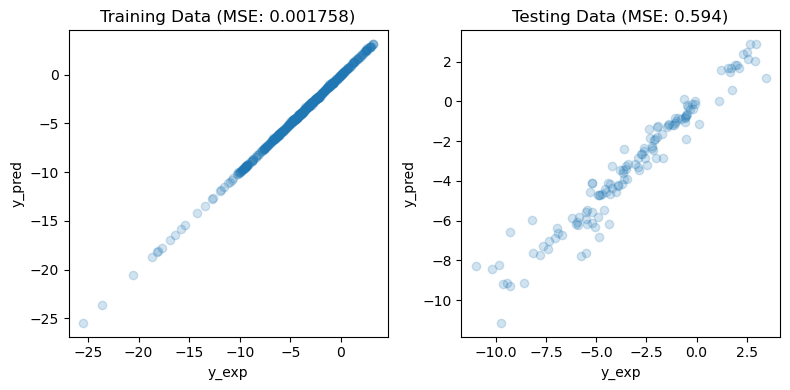

GBoost training/testing errors: 0.0021/0.5935 kcal/mol
top 10 Gini important features: ['TopoPSA(NO)', 'nHBDon', 'GATS1se', 'IC1', 'AATSC1are', 'TopoPSA', 'AATSC1pe', 'PEOE_VSA1', 'fMF', 'AATS1are']


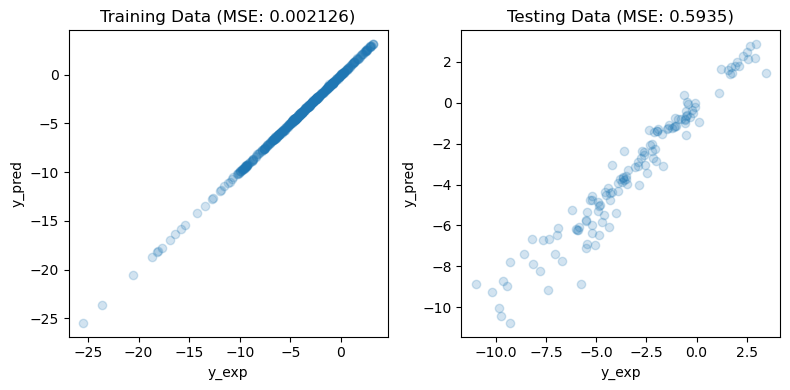

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error

np.random.seed(352809821) # for reproducibility

# Generate an 80:20 split for training and validation
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,random_state=135323)

# Initialize the models
# NOTE: You should experiment with hyperparameters in these initializations. Or implement cross validation to search over hyperparameter values.
models = { "DT": tree.DecisionTreeRegressor() ,\
           "RF": RandomForestRegressor(),\
           "BR": BaggingRegressor(),\
           "ADA": AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth=10),n_estimators=100,learning_rate=0.1),\
           "GBoost": GradientBoostingRegressor(max_depth=5) }

for i in models.keys():
    models[i].fit(X_train,y_train["expt"])
    train_err =  mean_squared_error(y_train["expt"],models[i].predict(X_train))
    test_err  =  mean_squared_error(y_test["expt"],models[i].predict(X_test))
    print("{} training/testing errors: {:<3.4f}/{:<3.4f} kcal/mol".format(i,train_err,test_err))

    if i == "BR":
        print("bagging requires you to collate the importance of all of the sub-trees to get this list.")
    else:
        print("top 10 Gini important features: {}".format(features.columns[np.argsort(models[i].feature_importances_)[::-1]].tolist()[:10]))

    # Make parity plots for training and testing performance
    plt.figure(figsize=(8,4))
    ax = plt.subplot(1,2,1)
    ax.plot(y_train["expt"], models[i].predict(X_train),linestyle="None",marker="o",alpha=0.2)
    ax.set_xlabel("y_exp")
    ax.set_ylabel("y_pred")
    ax.set_title("Training Data (MSE: {:<3.4})".format(train_err))
    
    ax = plt.subplot(1,2,2)
    ax.plot(y_test["expt"], models[i].predict(X_test),linestyle="None",marker="o",alpha=0.2)
    ax.set_xlabel("y_exp")
    ax.set_ylabel("y_pred")
    ax.set_title("Testing Data (MSE: {:<3.4})".format(test_err))
    plt.tight_layout()
    plt.show()


#### Gini Importance
In the cell above, we have used the <b>Gini Importance</b> to assess important features for our models. If you look at the distribution of Gini Importance values, you will see that the vast majority as zero, and a relatively small number are actually used by the models. The Gini Importance is calcalated as 
$$GI_x = \sum_\mathrm{i\in x}^\mathrm{splits}f_\mathrm{i} $$
where $\mathrm{x}$ is the feature whose importance we are evaluating, the summation is over all splits/nodes ($\mathrm{i}$) that use feature $\mathrm{x}$, and $f_\mathrm{i}$ is the fraction of training samples that encounter node $\mathrm{i}$. For example, if a feature is never used in a split, then is GI=0. Depending on how $f_\mathrm{i}$ is implemented, there may or may not be an upper bound for GI. For ensemble methods, the Gini Importance is calculated the same way, except that it is averaged over all trees in the ensemble:

$$GI_x = \sum_\mathrm{t}^\mathrm{trees}\sum_\mathrm{i\in x}^\mathrm{splits}f_\mathrm{i}^\mathrm{t} $$